# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies
import pandas as pd, numpy as np

In [2]:
#On importe les données dans un dataframe

df_histo = pd.read_excel("historique_immobilier_paris.xlsx")
df_port = pd.read_excel("portefeuille_actifs.xlsx")

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent

print(f"Types de données : \n{df_histo.dtypes}", end='\n\n')
print(f"Types de données : \n{df_port.dtypes}", end='\n\n')

Types de données : 
date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

Types de données : 
adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object



### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
print(f"La liste des différents types de biens immobiliers que nous avons est : \n{df_histo['type_local'].unique()}")

La liste des différents types de biens immobiliers que nous avons est : 
['Appartement' 'Local industriel. commercial ou assimilé']


In [5]:
print(f"On observe qu'il y a : {df_histo['type_local'].nunique()} types de biens")
print(f"Et que leurs codes types sont : {df_histo['code_type_local'].unique()}")

On observe qu'il y a : 2 types de biens
Et que leurs codes types sont : [2 4]


### 3. Nombre de transactions

In [6]:
#On verifie le nombre de transactions que nous avons dans notre dataframe

total_transac = df_histo['date_mutation'].count()
appart_transac = df_histo[df_histo['type_local'] == 'Appartement']['date_mutation'].count()
locaux_transac = df_histo[df_histo['type_local'] == 'Local industriel. commercial ou assimilé']['date_mutation'].count()

print(f"le nombre de transactions dans les données est : {total_transac}")
print(f"le nombre de transactions pour les appartements dans les données est {appart_transac}")
print(f"le nombre de transactions pour les locaux commerciaux dans les données est {locaux_transac}")

le nombre de transactions dans les données est : 26196
le nombre de transactions pour les appartements dans les données est 24353
le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [7]:
#On vérifie également la plage de l'historique disponible

print(f"La première date de transaction dans les données est le : {df_histo['date_mutation'].min()}")
print(f"La dernière date de transaction dans les données est le : {df_histo['date_mutation'].max()}")

La première date de transaction dans les données est le : 2017-01-02 00:00:00
La dernière date de transaction dans les données est le : 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [8]:
# Calcul de la colonne
df_histo['prix_m2'] = df_histo['valeur_fonciere'] / df_histo['surface_reelle']

# Arrondir les valeurs des colonnes à 2 décimales
df_histo['valeur_fonciere'] = df_histo['valeur_fonciere'].round(2)
df_histo['prix_m2'] = df_histo['prix_m2'].round(2)

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [9]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps

df_appart = df_histo[df_histo['code_type_local'] == 2].copy()
df_appart.drop(columns=["adresse_numero", "adresse_nom_voie", "nom_commune", "code_type_local", "type_local"], inplace=True)
df_appart.head()

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_m2
0,2017-01-03,550559.68,75003,50,11011.19
1,2017-01-12,1576492.46,75008,163,9671.73
2,2017-01-10,657757.36,75008,66,9966.02
3,2017-01-10,250086.82,75003,22,11367.58
4,2017-01-13,176266.71,75001,15,11751.11


In [10]:
#Préparons un dataframe en regroupant par année, les prix moyens de ventes des appartements avec la surface moyenne associée

df_appart['annee'] = df_appart['date_mutation'].dt.year
df_appart_annee = df_appart.groupby('annee').agg({'prix_m2': 'mean', 'surface_reelle': 'mean'}).reset_index()
df_appart_annee

,annee,prix_m2,surface_reelle
0,2017,9492.859239,44.627737
1,2018,10031.403469,44.271671
2,2019,10562.712563,43.361645
3,2020,10674.872719,42.900654
4,2021,10455.600179,43.479864


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>

<p><span style="color: green;">Les données indiquent une tendance à la hausse jusqu'en 2019, avec une légère variation par la suite</span>.</p>

Nous allons créer un graphique pour mieux le visualiser.

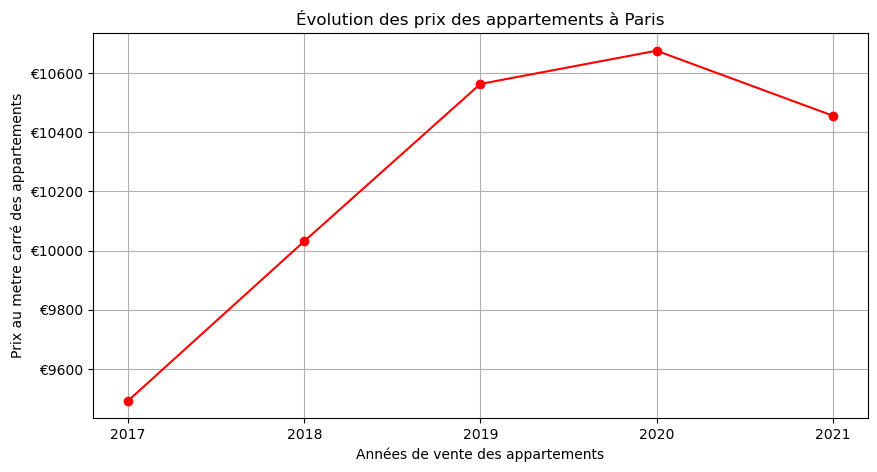

In [11]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))
plt.plot(df_appart_annee['annee'], df_appart_annee['prix_m2'], color='red', marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carré des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title('Évolution des prix des appartements à Paris')
plt.xticks(df_appart_annee['annee'])
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [12]:
#Liste des codes postaux dans nos données.

print("Nombre total de codes postaux différents :", len(df_appart['code_postal'].unique()))
print(sorted(df_appart['code_postal'].unique()))

Nombre total de codes postaux différents : 20
[75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]


In [13]:
#Créons un dataframe pour une deuxième visualisation avec l'évolution des prix par arrondissement

df_ardt = df_appart.groupby(['code_postal', 'annee']).agg({'prix_m2': 'mean'}).reset_index()
df_ardt.head(10)

,code_postal,annee,prix_m2
0,75001,2017,11762.706207
1,75001,2018,12621.226327
2,75001,2019,13269.256593
3,75001,2020,13405.991429
4,75001,2021,13379.498571
5,75002,2017,10920.126744
6,75002,2018,11309.461304
7,75002,2019,12150.543037
8,75002,2020,12181.589767
9,75002,2021,11773.445630


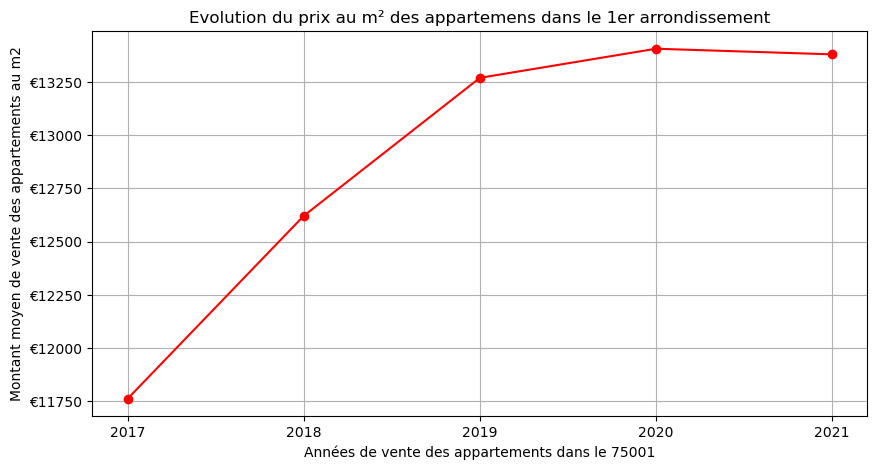

In [14]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement

df_75001 = df_ardt[df_ardt['code_postal'] == 75001]

plt.figure(figsize=(10,5))
plt.plot(df_75001['annee'], df_75001['prix_m2'], color='red', marker='o')
plt.xlabel('Années de vente des appartements dans le 75001')
plt.ylabel('Montant moyen de vente des appartements au m2')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² des appartemens dans le 1er arrondissement')
plt.xticks(df_75001['annee'])
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

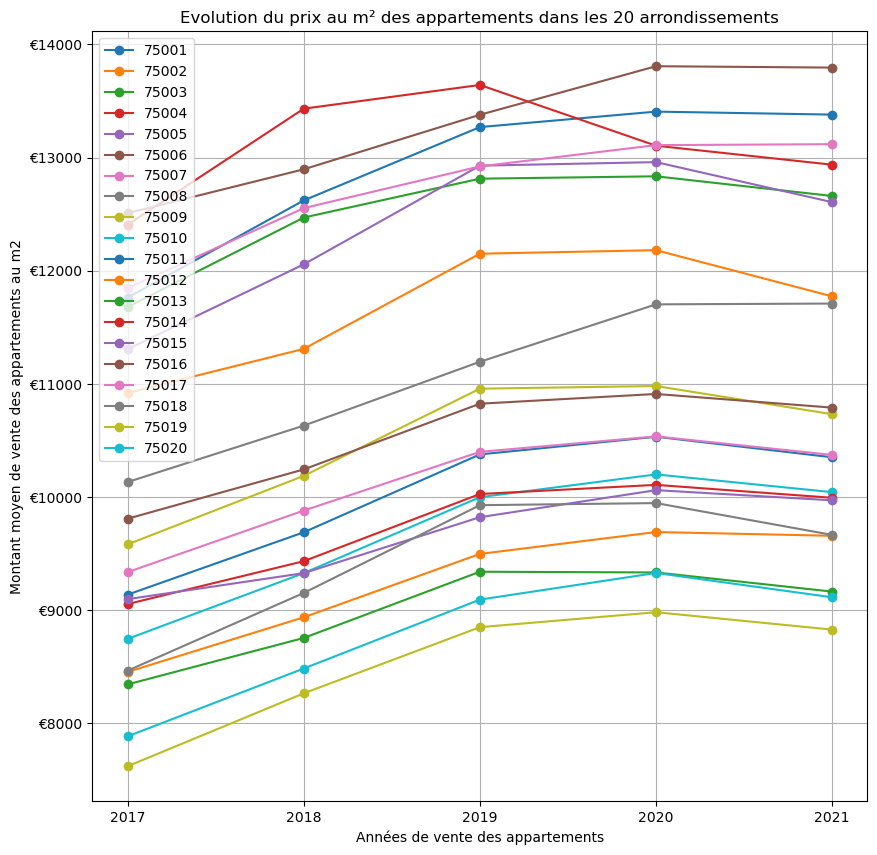

In [15]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris

plt.figure(figsize=(10,10))

for code_postal in df_ardt['code_postal'].unique():
    df_temp = df_ardt[df_ardt['code_postal'] == code_postal]
    plt.plot(df_temp['annee'], df_temp['prix_m2'], label=f'{code_postal}', marker='o')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements au m2')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title('Evolution du prix au m² des appartements dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.xticks(df_ardt['annee'].unique())
plt.show()

On observe que globalement que ?

<p><span style="color: green;">
Jusqu'en 2019, les données suggèrent une tendance à la hausse, suivie d'une légère fluctuation par la suite.</span></p>

### 7. Prix au metre carré par transaction dans un arrondissement

In [16]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

df_75006 = df_appart[df_appart['code_postal'] == 75006]

nb_transac_75006 = len(df_75006)
pourct_transac = round(nb_transac_75006 * 100 / len(df_appart), 2)

print(f"Le nombre de transactions dans le 6ème est : {nb_transac_75006}")
print(f"Ce qui représente {pourct_transac}% du total des transactions des appartements.")

Le nombre de transactions dans le 6ème est : 709
Ce qui représente 2.91% du total des transactions des appartements.


<p><span style="color: green;">On constate que cette proportion est relativement faible par rapport à l'ensemble des transactions.</span>

Affichons l'historique des transactions pour visualiser la dispersion des données :<p>

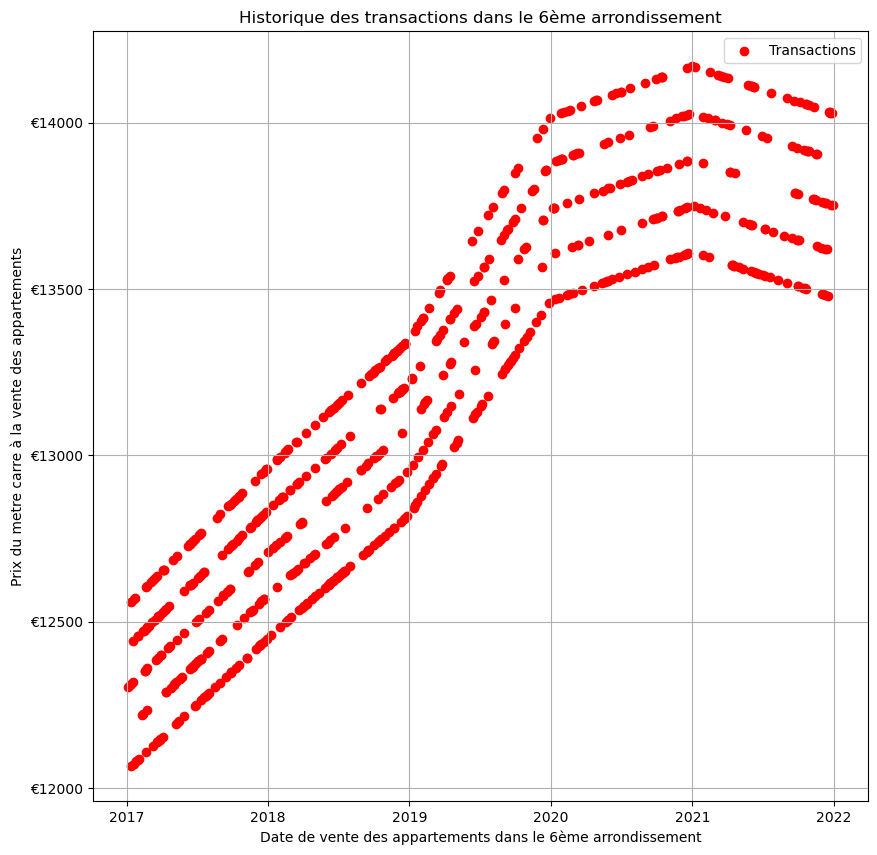

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df_75006['date_mutation'], df_75006['prix_m2'], label='Transactions', color='red')
plt.xlabel('Date de vente des appartements dans le 6ème arrondissement')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title('Historique des transactions dans le 6ème arrondissement')
plt.legend()
plt.show()

On observe que les données indiquent une augmentation des prix jusqu'en 2021, suivie d'un mouvement baissier.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [18]:
from scipy.stats import pearsonr

# Ajouter la colonne 'date_mutation_numeric'
df_75006_copy = df_75006.copy()
df_75006_copy['date_numeric'] = pd.to_numeric(df_75006_copy['date_mutation'])

# Calcul du coefficient de corrélation de Pearson
coefficient_correlation, p_value = pearsonr(df_75006_copy['prix_m2'], df_75006_copy['date_numeric'])

print(f"Coefficient de corrélation de Pearson : {coefficient_correlation}")
print(f"P-value : {p_value}")

Coefficient de corrélation de Pearson : 0.9038445780332465
P-value : 7.109002386556297e-263


Le coefficient de corrélation est de 0.90 avec une pvalue de 7.10 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [19]:
coefficient_correlation, p_value = pearsonr(df_75006['surface_reelle'], df_75006['valeur_fonciere'])
print(f"Coefficient de corrélation : {coefficient_correlation}")
print(f"P-value : {p_value}")

Coefficient de corrélation : 0.9977572898153474
P-value : 0.0


Le coefficient de corrélation est de 0.997 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [20]:
#On crée un dataset qui ne contient que les locaux commerciaux

df_locaux = df_histo[df_histo['code_type_local'] == 4].copy()
df_locaux.drop(columns=["adresse_numero", "adresse_nom_voie", "nom_commune", "code_type_local", "type_local"], inplace=True)
df_locaux.head()

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_m2
18,2017-02-01,3113277.30,75003,250,12453.11
29,2017-02-17,1164375.26,75003,95,12256.58
34,2017-02-20,380252.19,75003,31,12266.20
91,2017-03-09,362384.17,75001,29,12496.01
109,2017-03-29,315907.23,75003,25,12636.29


In [21]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

df_locaux['annee'] = df_locaux['date_mutation'].dt.year
df_locaux_annee = df_locaux.groupby('annee').agg({'prix_m2': 'mean', 'surface_reelle': 'mean'}).reset_index()

df_locaux_annee

,annee,prix_m2,surface_reelle
0,2017,10949.909513,89.991404
1,2018,11569.499430,88.096866
2,2019,11960.132199,82.826389
3,2020,11966.470268,85.630952
4,2021,12006.488747,92.832000


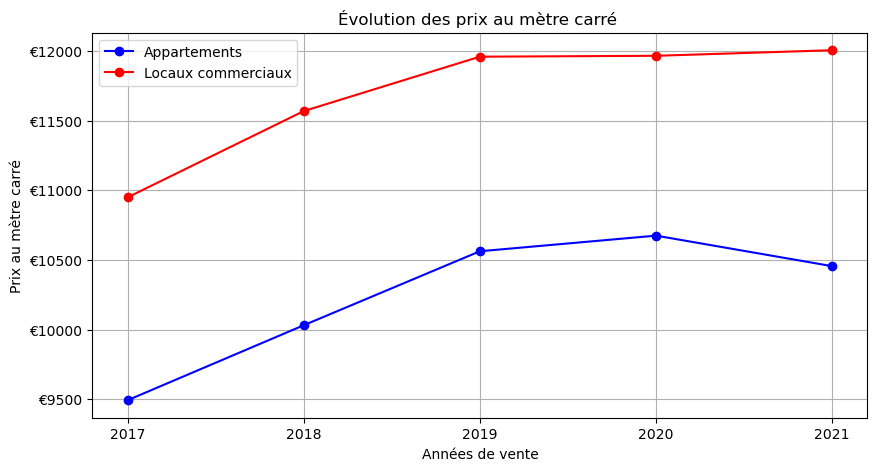

In [49]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix

plt.figure(figsize=(10,5))
plt.plot(df_appart_annee['annee'], df_appart_annee['prix_m2'],label='Appartements',color='blue', marker='o')
plt.plot(df_locaux_annee['annee'], df_locaux_annee['prix_m2'],label='Locaux commerciaux',color='red', marker='o')
plt.xlabel('Années de vente')
plt.ylabel('Prix au mètre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title('Évolution des prix au mètre carré ')
plt.xticks(df_appart_annee['annee'])
plt.show()

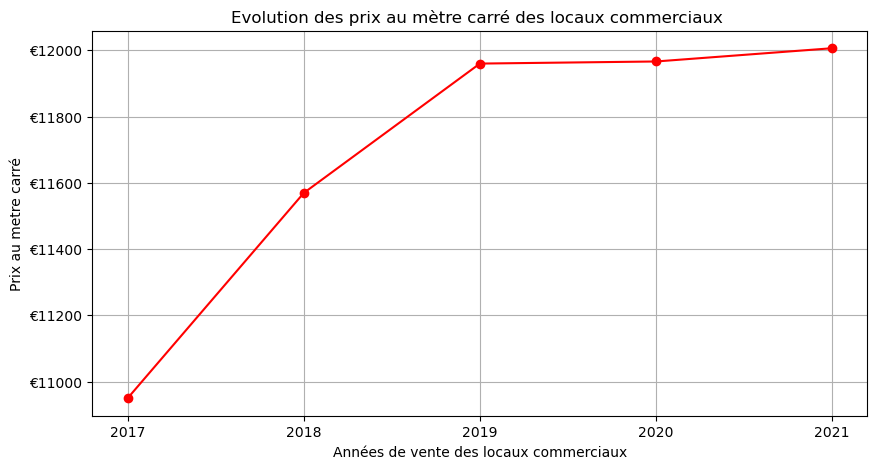

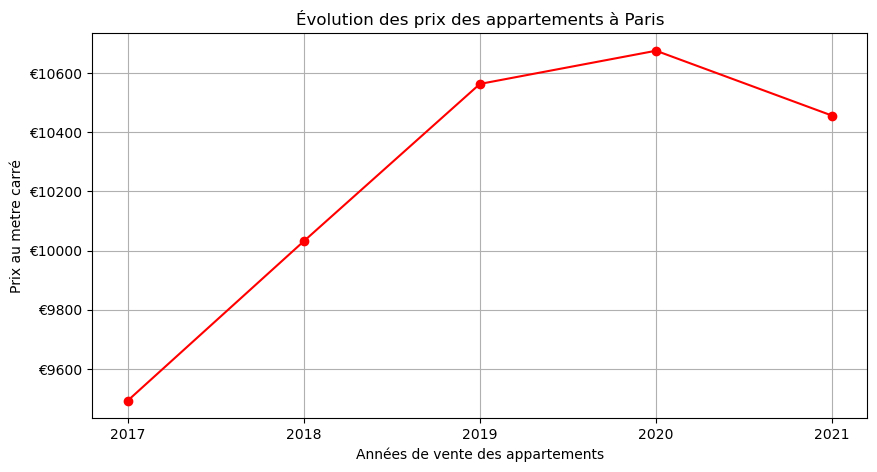

In [23]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix des locaux commerciaux

plt.figure(figsize=(10,5))
plt.plot(df_locaux_annee['annee'], df_locaux_annee['prix_m2'],color='red', marker='o')
plt.xlabel('Années de vente des locaux commerciaux')
plt.ylabel('Prix au metre carré')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title('Evolution des prix au mètre carré des locaux commerciaux ')
plt.xticks(df_appart_annee['annee'])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df_appart_annee['annee'], df_appart_annee['prix_m2'], color='red', marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carré')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.title('Évolution des prix des appartements à Paris')
plt.xticks(df_appart_annee['annee'])
plt.show()

Le prix au metre carré des locaux commerciaux demeure stable depuis 2019, tandis que celui des appartement décroit.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [24]:
df_algo = df_histo.copy()

# Création des variables binaires pour les colonnes catégoriques
df_algo = pd.get_dummies(df_algo, columns=['code_postal', 'code_type_local'])

# Création d'une colonne 'temps' à partir de 'date_mutation'
df_algo['timestamp'] = df_algo['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9

# Suppression des colonnes inutiles
df_algo.drop(columns=["adresse_numero", "adresse_nom_voie", "nom_commune", "type_local", "date_mutation"], inplace=True)

df_algo.head()

,valeur_fonciere,surface_reelle,prix_m2,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,code_type_local_2,code_type_local_4,timestamp
0,550559.68,50,11011.19,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.483402e+09
1,1576492.46,163,9671.73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484179e+09
2,657757.36,66,9966.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
3,250086.82,22,11367.58,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
4,176266.71,15,11751.11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [25]:
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques (X), et de la variable cible (y)
X = df_algo.drop(['valeur_fonciere', 'prix_m2'], axis=1)
y = df_algo['valeur_fonciere']

# Utilisation de train_test_split pour diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Dimensions de l'ensemble d'entraînement X:", X_train.shape)
print("Dimensions de l'ensemble de test X:", X_test.shape)
print("Dimensions de l'ensemble d'entraînement y:", y_train.shape)
print("Dimensions de l'ensemble de test y:", y_test.shape)

Dimensions de l'ensemble d'entraînement X: (17551, 24)
Dimensions de l'ensemble de test X: (8645, 24)
Dimensions de l'ensemble d'entraînement y: (17551,)
Dimensions de l'ensemble de test y: (8645,)


In [26]:
#conversion des données en str (conversion du nom des colonnes)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [27]:
#On entraîne l'algorithme et on effectue la prédiction
from sklearn.linear_model import LinearRegression

# Initialisation de l'algorithme
model_linear = LinearRegression()

# Entraînement de l'algorithme sur l'ensemble d'entraînement
model_linear.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_linear.predict(X_test)

# Calcul du % d'erreur
taux_erreur = (np.mean(abs(y_test-y_pred)/y_test))*100

print(y_pred)
print("\nErreur en %:", taux_erreur)

[211984.47496752 274888.48196472 274788.46542466 ... 244263.59413297
  83500.73080113 344621.72441719]

Erreur en %: 9.529220688368579


In [28]:
# Calcul du coefficient de détermination R² (R-squared)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9860647556888856


Notre algorithme fait donc 9.5% d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat : 
 - Le R² de 0.98 suggère une excellente adéquation du modèle aux données.
 - Le taux d'erreur en pourcentage de 9.53% indique une précision acceptable.

Comment j'aurais pu aller plus loin :
- Entraînement d'un autre algorithme (ElasticNet)

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Grille de valeurs d'alpha à explorer
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialisation du modèle ElasticNet
model_elastic = ElasticNet()

# Recherche d'hyperparamètres avec validation croisée
grid_search = GridSearchCV(model_elastic, param_grid, cv=5)
grid_search.fit(X, y)

print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'alpha': 0.1}


In [30]:
# Initialisation de l'algorithme
model_elastic = ElasticNet(alpha=0.1)

# Entraînement de l'algorithme sur l'ensemble d'entraînement
model_elastic.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_elastic.predict(X_test)

# Calcul du % d'erreur
taux_erreur = (np.mean(abs(y_test-y_pred)/y_test))*100

print(y_pred)
print("\nErreur en %:", taux_erreur)

[221838.50700002 186381.20126035 287485.96897942 ... 212189.81223553
 117067.2916196  391436.47611673]

Erreur en %: 7.156376573704777


# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [31]:
#On importe les données dans un dataframe
df_port = df_port[["code_postal", "code_type_local", "surface_reelle_bati"]]
df_port = df_port.rename(columns={'surface_reelle_bati': 'surface_reelle'})
df_port.head()

,code_postal,code_type_local,surface_reelle
0,75001,2,25
1,75003,2,22
2,75003,2,65
3,75008,2,74
4,75008,2,22


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [32]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_port_encoded = pd.get_dummies(df_port, columns=['code_postal', 'code_type_local'])

#On crée une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
df_port_encoded['timestamp'] = pd.Timestamp('2022-12-31').timestamp()

df_port_encoded.head()

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,code_type_local_2,code_type_local_4,timestamp
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.672445e+09


In [33]:
#Conversion du dataframe en str

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [34]:
#On effectue la prédiction
predictions_portefeuille = model_linear.predict(df_port_encoded)

#On vérifie les 10 premières valeurs
print(predictions_portefeuille[:10])

[431444.35010911 368861.39071252 827086.35885374 878984.85277293
 324852.33316029 463385.46306345 390174.17992839 642454.13130115
 139736.78531348 141906.86823726]


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [35]:
df_port['prediction'] = predictions_portefeuille

prediction_part = round(df_port[df_port['code_type_local'] == 2]['prediction'].sum() / 1e6, 2)
prediction_corp = round(df_port[df_port['code_type_local'] == 4]['prediction'].sum() / 1e6, 2)

In [36]:
#Valorisation du portefeuille sur le segment des particuliers
print(f'La valorisation du segment particulier est {prediction_part} (en millions d\'euros):')

La valorisation du segment particulier est 71.05 (en millions d'euros):


In [37]:
#Valorisation du portefeuille sur le segment corporate
print(f'La valorisation du segment corporate est {prediction_corp} (en millions d\'euros):')

La valorisation du segment corporate est 97.97 (en millions d'euros):


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment corporate affiche une valorisation prédictive significativement plus élevée. 
- Des facteurs non pris en compte par le modèle pourraient influencer les estimations. 
- La fiabilité des résultats doit être évaluée avec prudence et peut nécessiter une validation sur des données indépendantes.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [38]:
#On importe les données dans un dataframe
df_echant = pd.read_excel("echantillon.xlsx")

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [39]:
df_echant['prix_m2'] = df_echant['valeur_fonciere'] / df_echant['surface_reelle']
df_echant.drop(columns=['valeur_fonciere', 'surface_reelle', 'nom_commune'], inplace=True)
df_echant.head()

,code_postal,prix_m2
0,75019,9871.444128
1,75019,10045.572493
2,75019,9194.697790
3,75019,9469.142168
4,75019,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=42)
df_echant['cluster'] = kmeans.fit_predict(df_echant[['prix_m2']])

In [42]:
# On vérifie les données de la prédiction

# Afficher les centres de cluster
print(kmeans.cluster_centers_)

# Compter le nombre de points de données dans chaque cluster
nb_cluster = df_echant['cluster'].value_counts()
print(nb_cluster)

[[7408.77502952]
 [9806.92467429]]
1    20
0    20
Name: cluster, dtype: int64


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 1 pour Local industriel et les valeurs à 0 pour Appartement. 

In [43]:
df_echant.head()

,code_postal,prix_m2,cluster
0,75019,9871.444128,1
1,75019,10045.572493,1
2,75019,9194.697790,1
3,75019,9469.142168,1
4,75019,7463.610005,0


In [44]:
df_echant['type_local'] = df_echant['cluster'].replace({0: 'Appartement', 1: 'Local industriel'})
df_echant.drop(columns='cluster', inplace=True)
df_echant.head(10)

,code_postal,prix_m2,type_local
0,75019,9871.444128,Local industriel
1,75019,10045.572493,Local industriel
2,75019,9194.697790,Local industriel
3,75019,9469.142168,Local industriel
4,75019,7463.610005,Appartement
5,75019,9982.016919,Local industriel
6,75019,9674.262777,Local industriel
7,75019,7348.917415,Appartement
8,75019,9789.051438,Local industriel
9,75019,7616.420959,Appartement


In [45]:
df_echant
#rajouter colonnes

,code_postal,prix_m2,type_local
0,75019,9871.444128,Local industriel
1,75019,10045.572493,Local industriel
2,75019,9194.697790,Local industriel
3,75019,9469.142168,Local industriel
4,75019,7463.610005,Appartement
5,75019,9982.016919,Local industriel
6,75019,9674.262777,Local industriel
7,75019,7348.917415,Appartement
8,75019,9789.051438,Local industriel
9,75019,7616.420959,Appartement


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Présentation Powerpoint